In [ ]:
# imports
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from math import sqrt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


# this allows plots to appear directly in the notebook
%matplotlib inline

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving owid-covid-data.csv to owid-covid-data.csv


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving SML project dataset.csv to SML project dataset.csv


In [ ]:
# read data into a DataFrame
data = pd.read_csv('owid-covid-data.csv', usecols=[3,5,8])
data_class=data.drop(columns=['date'])
data.head()

,date,new_cases,new_deaths
0,2020-02-24,5.0,NaN
1,2020-02-25,0.0,NaN
2,2020-02-26,0.0,NaN
3,2020-02-27,0.0,NaN
4,2020-02-28,0.0,NaN


In [ ]:
#filtering data sets
data.dropna(how='any', inplace=True)
data = data.reset_index(drop=True)
data['new_cases'] = pd.to_numeric(data['new_cases'],errors = 'coerce')
data['new_deaths'] = pd.to_numeric(data['new_deaths'],errors = 'coerce')
df_new = data.groupby(by=["date"], dropna=False).sum()

In [ ]:
# Creating Index For Flexibility
df_new
obs = np.arange(1, len(df_new) + 1, 1)

In [ ]:
#Taking indicators for prediction
new_cases = df_new[['new_cases']]
new_deaths = df_new[['new_deaths']]

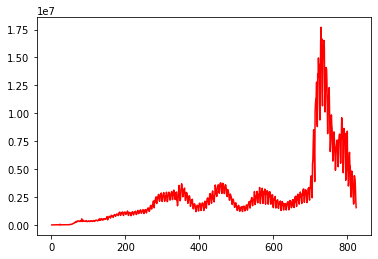

In [ ]:
#ploting indicators
plt.plot(obs, new_cases, 'r', label = 'NewCases')

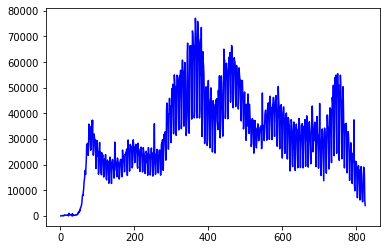

In [ ]:
#ploting indicators
plt.plot(obs, new_deaths, 'b', label = 'NewDeaths')

In [ ]:
# Preperation of time series datasets
scaler = MinMaxScaler(feature_range=(0, 1))
new_cases = scaler.fit_transform(new_cases)
new_deaths = scaler.fit_transform(new_deaths)

In [ ]:
# TRAIN-TEST split
train_NC = int(len(new_cases) * 0.75)
test_NC = len(new_cases) - train_NC
train_NC, test_NC = new_cases[0:train_NC,:], new_cases[train_NC:len(new_cases),:]
train_ND = int(len(new_deaths) * 0.75)
test_ND = len(new_deaths) - train_ND
train_ND, test_ND = new_deaths[0:train_ND,:], new_deaths[train_ND:len(new_deaths),:]


In [ ]:
# Function to create time series data
def new_dataset(df_new, step_size):
	data_X, data_Y = [], []
	for i in range(len(df_new)-step_size-1):
		a = df_new[i:(i+step_size), 0]
		data_X.append(a)
		data_Y.append(df_new[i + step_size, 0])
	return np.array(data_X), np.array(data_Y)

In [ ]:
#Time Series Datasets
trainX, trainY = new_dataset(train_NC, 1)
testX, testY = new_dataset(test_NC, 1)
trainX1, trainY1 = new_dataset(train_ND, 1)
testX1, testY1 = new_dataset(test_ND, 1)

In [ ]:
#Reshaping Data
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX1 = np.reshape(trainX1, (trainX1.shape[0], 1, trainX1.shape[1]))
testX1 = np.reshape(testX1, (testX1.shape[0], 1, testX1.shape[1]))
step_size = 1

In [ ]:
#
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='RMSProp') # Try RMSProp, AdaDelta, SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
616/616 - 5s - loss: 0.0015 - 5s/epoch - 8ms/step
Epoch 2/10
616/616 - 1s - loss: 2.8543e-04 - 1s/epoch - 2ms/step
Epoch 3/10
616/616 - 1s - loss: 2.6851e-04 - 1s/epoch - 2ms/step
Epoch 4/10
616/616 - 1s - loss: 2.7905e-04 - 1s/epoch - 2ms/step
Epoch 5/10
616/616 - 1s - loss: 2.6597e-04 - 1s/epoch - 2ms/step
Epoch 6/10
616/616 - 1s - loss: 2.6341e-04 - 1s/epoch - 2ms/step
Epoch 7/10
616/616 - 1s - loss: 2.6618e-04 - 1s/epoch - 2ms/step
Epoch 8/10
616/616 - 1s - loss: 2.5752e-04 - 1s/epoch - 2ms/step
Epoch 9/10
616/616 - 1s - loss: 2.4881e-04 - 1s/epoch - 2ms/step
Epoch 10/10
616/616 - 1s - loss: 2.5544e-04 - 1s/epoch - 2ms/step


In [ ]:
model.compile(loss='mean_squared_error', optimizer='RMSProp') 
model.fit(trainX1, trainY1, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
616/616 - 5s - loss: 0.0081 - 5s/epoch - 8ms/step
Epoch 2/10
616/616 - 1s - loss: 0.0080 - 1s/epoch - 2ms/step
Epoch 3/10
616/616 - 1s - loss: 0.0079 - 1s/epoch - 2ms/step
Epoch 4/10
616/616 - 1s - loss: 0.0078 - 1s/epoch - 2ms/step
Epoch 5/10
616/616 - 1s - loss: 0.0079 - 1s/epoch - 2ms/step
Epoch 6/10
616/616 - 1s - loss: 0.0080 - 1s/epoch - 2ms/step
Epoch 7/10
616/616 - 1s - loss: 0.0080 - 1s/epoch - 2ms/step
Epoch 8/10
616/616 - 1s - loss: 0.0080 - 1s/epoch - 2ms/step
Epoch 9/10
616/616 - 1s - loss: 0.0079 - 1s/epoch - 2ms/step
Epoch 10/10
616/616 - 1s - loss: 0.0079 - 1s/epoch - 2ms/step


In [ ]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
trainPredict1 = model.predict(trainX1)
testPredict1 = model.predict(testX1)

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
trainPredict1 = scaler.inverse_transform(trainPredict1)
trainY1 = scaler.inverse_transform([trainY1])
testPredict1 = scaler.inverse_transform(testPredict1)
testY1 = scaler.inverse_transform([testY1])

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))
trainScore1 = math.sqrt(mean_squared_error(trainY1[0], trainPredict1[:,0]))
print('Train1 RMSE: %.2f' % (trainScore1))

Train RMSE: 1327.06
Train1 RMSE: 6650.32


In [ ]:
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))
testScore1 = math.sqrt(mean_squared_error(testY1[0], testPredict1[:,0]))
print('Test1 RMSE: %.2f' % (testScore1))

Test RMSE: 5842.38
Test1 RMSE: 7501.37


In [ ]:
trainPredictPlot = np.empty_like(new_cases)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict
trainPredictPlot1 = np.empty_like(new_deaths)
trainPredictPlot1[:, :] = np.nan
trainPredictPlot1[step_size:len(trainPredict1)+step_size, :] = trainPredict1

In [ ]:
testPredictPlot = np.empty_like(new_cases)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(new_cases)-1, :] = testPredict
testPredictPlot1 = np.empty_like(new_deaths)
testPredictPlot1[:, :] = np.nan
testPredictPlot1[len(trainPredict1)+(step_size*2)+1:len(new_deaths)-1, :] = testPredict1

In [ ]:
new_cases = scaler.inverse_transform(new_cases)
new_deaths = scaler.inverse_transform(new_deaths)

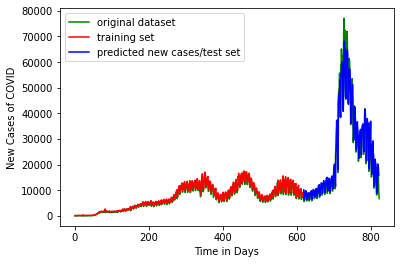

In [ ]:
plt.plot(new_cases, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted new cases/test set')
plt.legend(loc = 'upper left')
plt.xlabel('Time in Days')
plt.ylabel('New Cases of COVID')
plt.show()

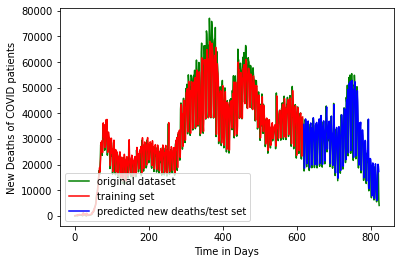

In [ ]:
plt.plot(new_deaths, 'g', label = 'original dataset')
plt.plot(trainPredictPlot1, 'r', label = 'training set')
plt.plot(testPredictPlot1, 'b', label = 'predicted new deaths/test set')
plt.legend(loc = 'lower left')
plt.xlabel('Time in Days')
plt.ylabel('New Deaths of COVID patients')
plt.show()

In [ ]:
data_class.dropna(how='any', inplace=True)
data_class = data_class.reset_index(drop=True)
data_class

,new_cases,new_deaths
0,6.0,1.0
1,2.0,0.0
2,32.0,0.0
3,6.0,1.0
4,11.0,0.0
...,...,...
156297,39.0,2.0
156298,47.0,1.0
156299,105.0,1.0
156300,36.0,0.0


In [ ]:
data1 = pd.read_csv('SML project dataset.csv', usecols=[0,1,2,3,6])
data1_class=data.drop(columns=['test_date'])
data1.head()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (0,1,2,3) have mixed types.Specify dtype option on import or set low_memory=False.



,test_date,cough,fever,sore_throat,corona_result
0,4/30/2020,0,0,0,0.0
1,4/30/2020,1,0,0,0.0
2,4/30/2020,0,1,0,0.0
3,4/30/2020,1,0,0,0.0
4,4/30/2020,1,0,0,0.0


In [ ]:
data1['corona_result'] = pd.to_numeric(data1['corona_result'],errors = 'coerce')
data1['cough'] = pd.to_numeric(data1['cough'],errors = 'coerce')
data1['fever'] = pd.to_numeric(data1['fever'],errors = 'coerce')
data1['sore_throat'] = pd.to_numeric(data1['sore_throat'],errors = 'coerce')
data1.dropna(how='any', inplace=True)
data1 = data1.reset_index(drop=True)

In [ ]:
#define the predictor variables and the response variable
X = data1[['cough']]
X1=data1[['fever']]
X2=data1[['sore_throat']]
y = data1['corona_result']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 
X_train4,X_test4,y_train4,y_test4 = train_test_split(X1,y,test_size=0.3,random_state=0)
X_train5,X_test5,y_train5,y_test5 = train_test_split(X2,y,test_size=0.3,random_state=0) 

#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)
log_regression.fit(X_train4,y_train4)
log_regression.fit(X_train5,y_train5)

LogisticRegression()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cough
Feature names seen at fit time, yet now missing:
- sore_throat


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- fever
Feature names seen at fit time, yet now missing:
- sore_throat




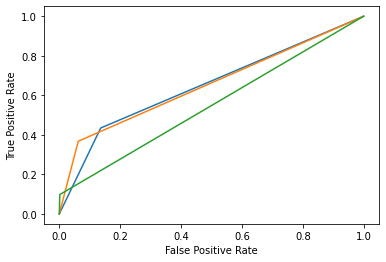

In [ ]:
#define metrics
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _= metrics.roc_curve(y_test,  y_pred_proba)

y_pred_proba1 = log_regression.predict_proba(X_test4)[::,1]
fpr1, tpr1, _= metrics.roc_curve(y_test4,  y_pred_proba1)

y_pred_proba2 = log_regression.predict_proba(X_test5)[::,1]
fpr2, tpr2, _= metrics.roc_curve(y_test5,  y_pred_proba2)

#create ROC curve
plt.plot(fpr,tpr)
plt.plot(fpr1,tpr1)
plt.plot(fpr2,tpr2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

0.03411535765223481
[0.12444558]


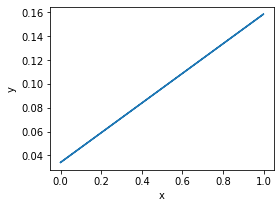

In [ ]:
feature_cols = ['cough']
X = data1[feature_cols]
y = data1.corona_result
X,X_test1,y,y_test1 = train_test_split(X,y,test_size=0.3,random_state=0) 
lm=LinearRegression()
lm.fit(X, y)
print(lm.intercept_)
print(lm.coef_)

y_test1= lm.predict(X_test1)
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.plot(X_test1, y_test1)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axis('auto')


plt.show()